## DATA-6550 Data Visualization Project

### Library Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [2]:
df = pd.read_csv('../../Data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df['Age'].fillna(df['Age'].median(), inplace = True)

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins, labels = labels, include_lowest = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeGroup     891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 85.2+ KB


---

In [37]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S,21-25
76,77,0,3,"Staneff, Mr. Ivan",male,28.0,0,0,349208,7.8958,NaN,S,25-30
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S,31-35
837,838,0,3,"Sirota, Mr. Maurice",male,28.0,0,0,392092,8.0500,NaN,S,25-30
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S,46-50


### Visualizations:

In [48]:
# Processed DataFrames for plotting

df_surv = df[df['Survived'] == 1]
df_nosurv = df[df['Survived'] == 0]

#### Good Visualization:

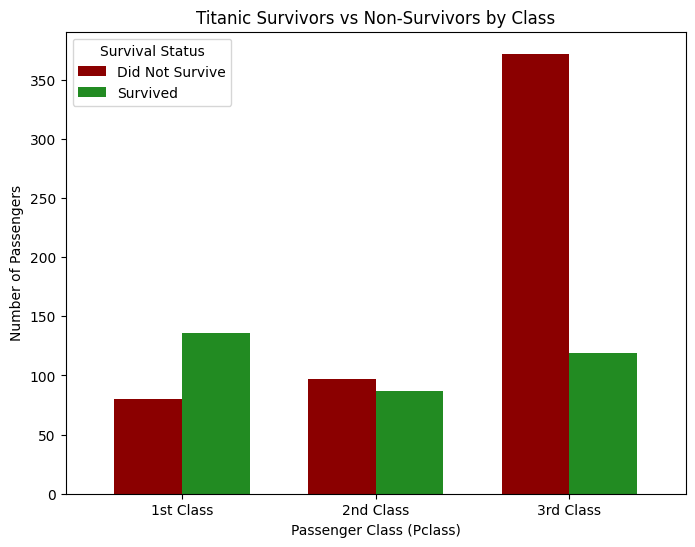

In [87]:
survival_by_pclass = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (8, 6))

survival_by_pclass.plot(kind = 'bar', stacked = False, ax = ax, color = ['darkred', 'forestgreen'], width = 0.7)

ax.set_xlabel('Passenger Class (Pclass)')
ax.set_ylabel('Number of Passengers')
ax.set_title('Titanic Survivors vs Non-Survivors by Class')
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation = 0)

ax.legend(['Did Not Survive', 'Survived'], title = 'Survival Status', loc = 'upper left')
plt.show()

##### This plot shows a clear distinction between the Passenger Classes as well as a clear color distinction on survivors vs. non-survivors for each class.

---

#### Bad Visualization:

/var/folders/42/5jr766g57bd9bxgy6m30dz880000gn/T/ipykernel_45433/2637676392.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax1.pie(df_surv.groupby('AgeGroup').size(), labels = labels)
/var/folders/42/5jr766g57bd9bxgy6m30dz880000gn/T/ipykernel_45433/2637676392.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax2.pie(df_nosurv.groupby('AgeGroup').size(), labels = labels)


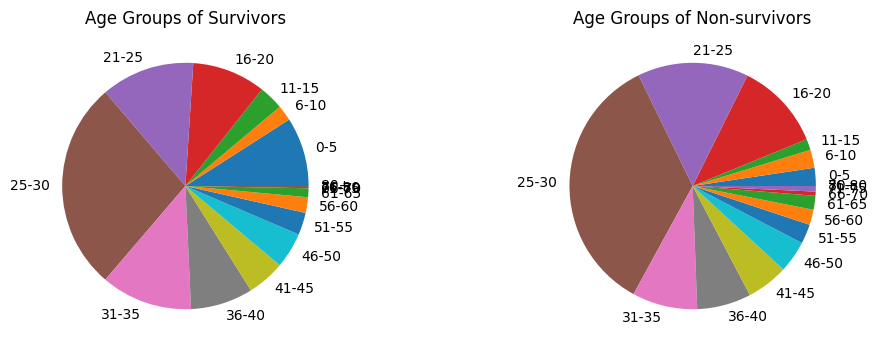

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

ax1.pie(df_surv.groupby('AgeGroup').size(), labels = labels)
ax1.set_title('Age Groups of Survivors')

ax2.pie(df_nosurv.groupby('AgeGroup').size(), labels = labels)
ax2.set_title('Age Groups of Non-survivors')

plt.show()

##### Although this plot could be useful, the age groups are purposely obtuse and difficult to understand with a pie chart. This could be remidied by using a histogram with smaller bins.

---